# Data Augmentation

In [1]:
from config import ROOT_DIR, DATA_AUGMENTED_DIR, FIGURES_DIR
from data.visualize import plot_samples
import os
import pandas as pd
from config import DATA_RAW_DIR, DATA_AUGMENTED_DIR, ROOT_DIR
import numpy as np
import tsgm.models.augmentations

2025-04-07 09:29:49.745177: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 09:29:48.156855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 09:29:48.159875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 09:29:48.317518: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 09:29:48.777299: I tensorflow/core/platform/cpu_feature_guar

In [ ]:

def augment_data(num_augmented, variance):
    jitter_aug_model = tsgm.models.augmentations.GaussianNoise()
    
    augment_data_dir = os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR)
    for root, _, files  in os.walk(augment_data_dir):
        for file in files:
            os.remove(os.path.join(root, file))
    
    for root, _, files  in os.walk(os.path.join(ROOT_DIR, DATA_RAW_DIR)):
        for file in files:
            src = os.path.join(root, file)            
            dest = os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR, os.path.basename(root))
        
            raw_data = pd.read_csv(src)
            
            raw_data.to_csv(os.path.join(dest, file), index=False)

            augmented = raw_data.copy()
            
            # Jittering Augmentation
            samples = jitter_aug_model.generate(
                np.atleast_3d(augmented[["flow", "pressure"]].to_numpy()).swapaxes(0, 2),
                n_samples=num_augmented,
                variance=variance
            )
            
            for i in range(num_augmented):
                augmented[["flow", "pressure"]] = np.maximum(samples[i].T, 0)
                augmented.reset_index(drop=True, inplace=True)
                
                file_name = file.removesuffix(".csv") + f"-aug-{i}.csv"
                augmented.to_csv(os.path.join(dest, file_name), index=False)

In [ ]:
augment_data(num_augmented=5, variance=3e-5)

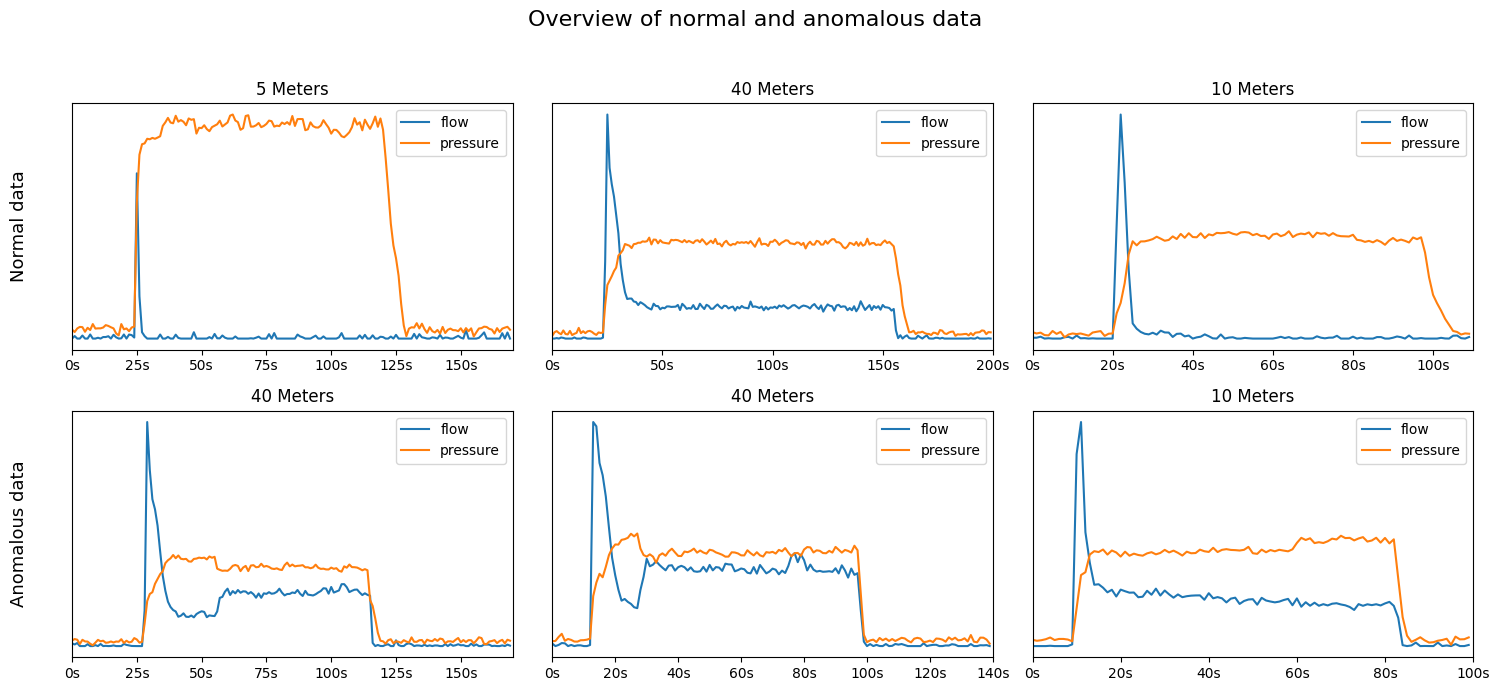

In [2]:
fig = plot_samples(os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR))
fig.savefig(os.path.join(FIGURES_DIR, "aug_plot.png"), dpi=fig.dpi)